### Import required packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### Load data file

In [2]:
df = pd.read_csv("datasets/Clustering_diabetesdata.csv", sep=',')
df.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Inspection
Display statistical data for each feature.

In [3]:
df.describe()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Visualization

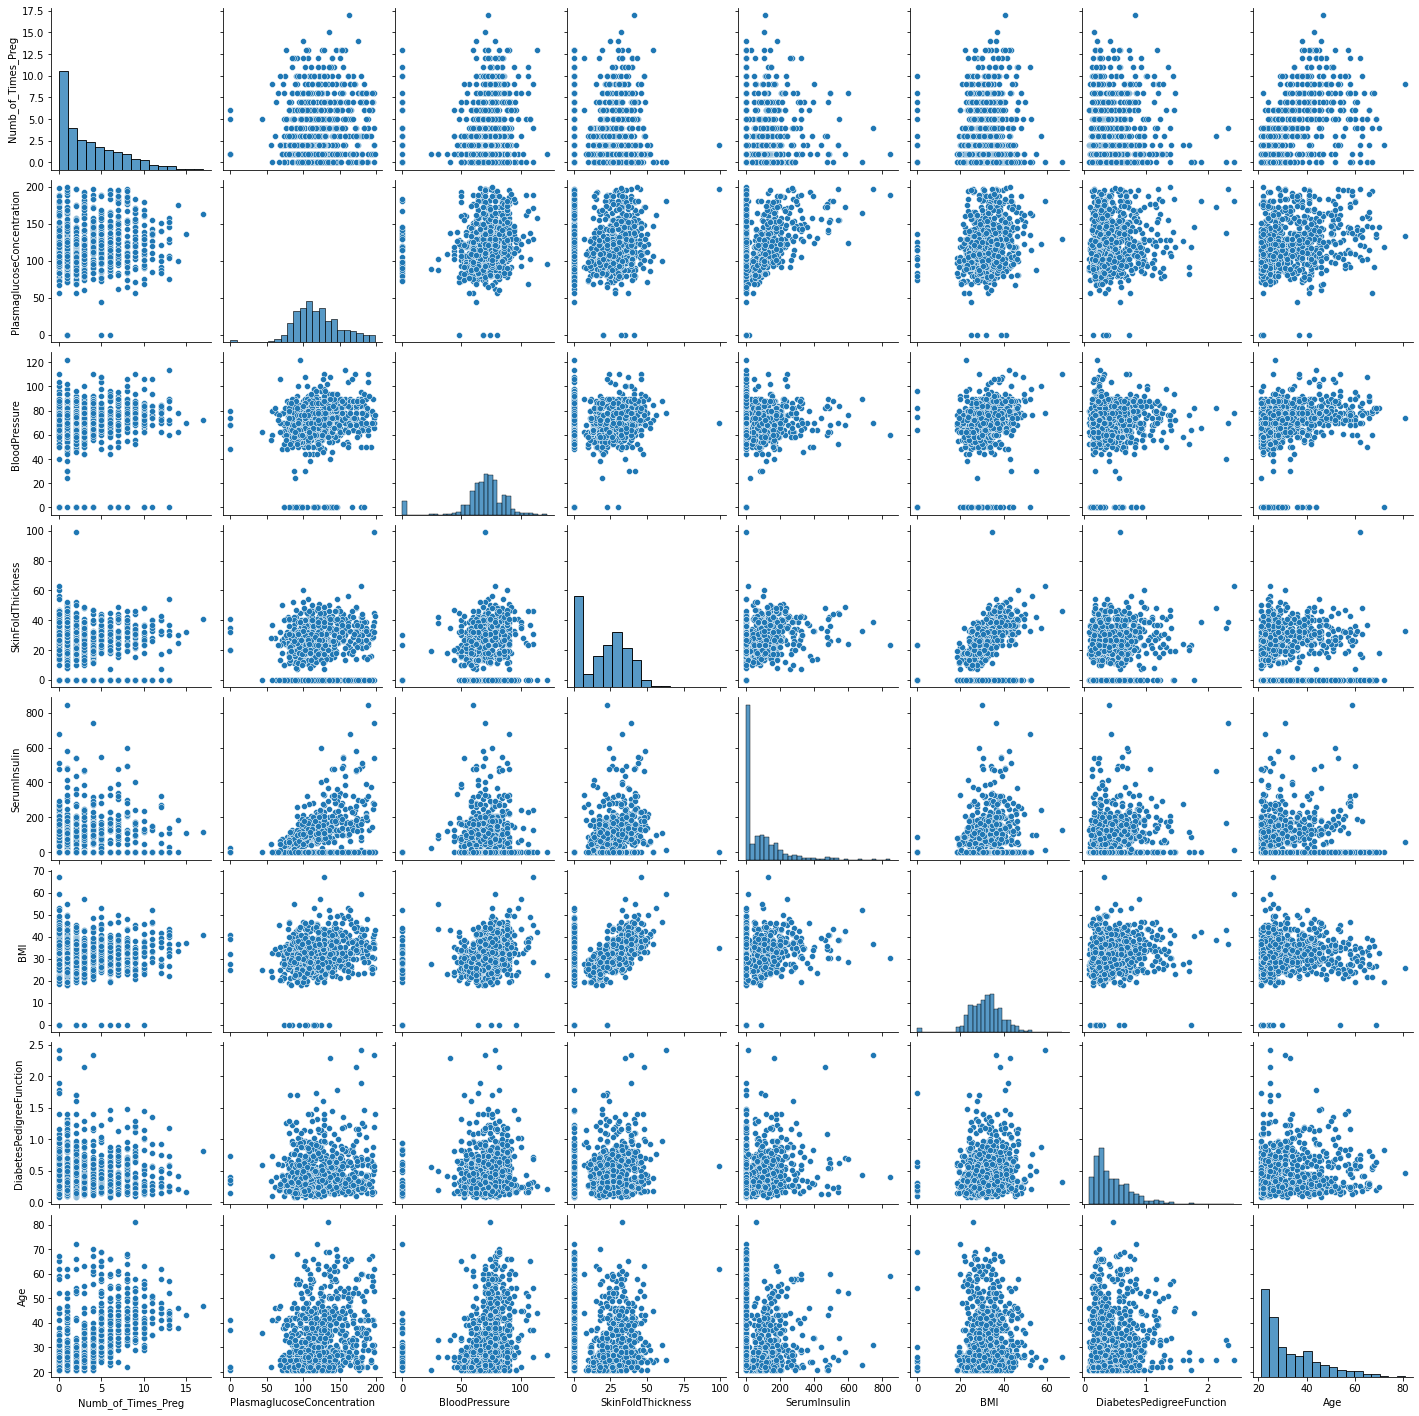

In [4]:
sns.pairplot(df)
plt.show()

## Normalization

In [5]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


## k-Means Clustering with two features
Selecting <b>BloodPressure</b> and <b>BMI</b>.

In [6]:
data = data_scaled[['SerumInsulin', 'DiabetesPedigreeFunction']]
x = data.iloc[:,0]
y = data.iloc[:,1]
x.head()

0    0.000000
1    0.000000
2    0.000000
3    0.621527
4    0.731335
Name: SerumInsulin, dtype: float64

Plot of the data shows that it falls into two clusters.

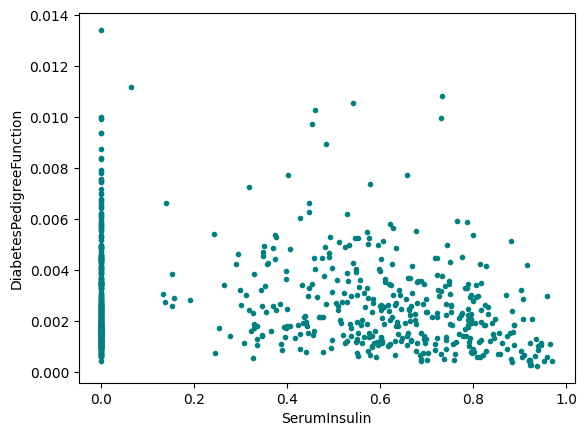

In [7]:
plt.scatter(x, y, marker='.', color="teal")
plt.xlabel("SerumInsulin");
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

Segment the groups and highlight the clusters
### Findings
Most of the data points in the cluster to the left marked in yellow can safely be regarded as outliers.

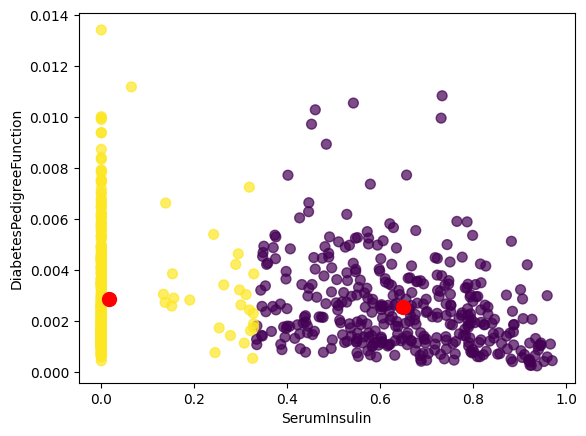

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
predicted_cluster_indexes = kmeans.predict(data)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel("SerumInsulin")
plt.ylabel("DiabetesPedigreeFunction")
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.show()

## k-Means Clustering with many features
Selecting all features except <b>Numb_of_Times_Preg</b> from the dataset.

In [9]:
data = data_scaled.drop('Numb_of_Times_Preg', axis=1)

Calculate silhouette_score

In [10]:
print(silhouette_score(data, kmeans.labels_))

0.5619567508014592


Using the elbow method to find the optimal number of clusters.

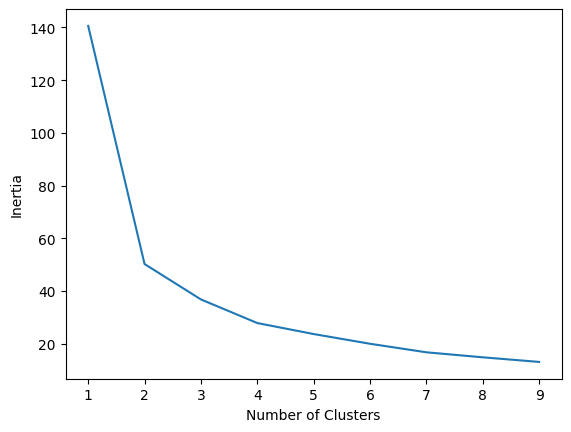

In [11]:
inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the elbow plot, 3 seems to be a good number.

Segment the data into clusters, and add a column named <b>Cluster</b> that represents the index of the cluster the row belongs to.

In [12]:
# create a KMeans class instance
kmeans = KMeans(n_clusters=2, random_state=0)

# fit data
kmeans.fit(data)

# generate predictions from data
clusters = kmeans.predict(data)

dfc = df[['PlasmaglucoseConcentration', 'BloodPressure', 'SkinFoldThickness', 'SerumInsulin', 'BMI', 
          'DiabetesPedigreeFunction', 'Age']]
dfc['Cluster_id'] = clusters

dfc.head(5)

,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Cluster_id
0,148,72,35,0,33.6,0.627,50,0
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,0
3,89,66,23,94,28.1,0.167,21,1
4,137,40,35,168,43.1,2.288,33,1


Calculate the average values of the data pertaining to each cluster.

In [13]:
results = pd.DataFrame(columns = ['Cluster_id', 'Average PlasmaglucoseConcentration', 
                                  'Average BloodPressure', 'Average SkinFoldThickness', 'Average SerumInsulin',
                                  'Average BMI', 'Average DiabetesPedigreeFunction', 'Average Age'])
 
for i in range(len(kmeans.cluster_centers_)):
    plasma = dfc[dfc['Cluster_id'] == i]['PlasmaglucoseConcentration'].mean()
    bp = dfc[dfc['Cluster_id'] == i]['BloodPressure'].mean()
    skin = dfc[dfc['Cluster_id'] == i]['SkinFoldThickness'].mean()
    insulin = dfc[dfc['Cluster_id'] == i]['SerumInsulin'].mean()
    bmi = dfc[dfc['Cluster_id'] == i]['BMI'].mean()
    dpf = dfc[dfc['Cluster_id'] == i]['DiabetesPedigreeFunction'].mean()
    age = dfc[dfc['Cluster_id'] == i]['Age'].mean()
 
    gdf = dfc[dfc['Cluster_id'] == i]
     
    #results.loc[i] = ([i, plasma, bp, skin, insulin, bmi, dpf, age])
    results.loc[i] = ([i, plasma, bp, skin, insulin, bmi, dpf, age])
    results['Cluster_id'] = results['Cluster_id'].astype(int)

### Findings
The average values of the selected features are all highest in the first cluster id <b>0</b> except for <b>Age</b>, possibly indicating correlation between them.

In [14]:
results.head()

,Cluster_id,Average PlasmaglucoseConcentration,Average BloodPressure,Average SkinFoldThickness,Average SerumInsulin,Average BMI,Average DiabetesPedigreeFunction,Average Age
0,0,118.033816,67.821256,12.806763,3.985507,30.801449,0.420652,35.118357
1,1,124.240113,70.607345,29.576271,168.463277,33.385593,0.531782,31.045198


## Hierarchical Clustering with many features
Selecting all features from the dataset.

In [15]:
data = data_scaled

Draw dendrogram to make it easier to select the number of clusters. The x-axis contains the values while the y-axis represents the distance between them.<br>
The threshold value 2500 cuts the dendrogram, leaving two clusters below.

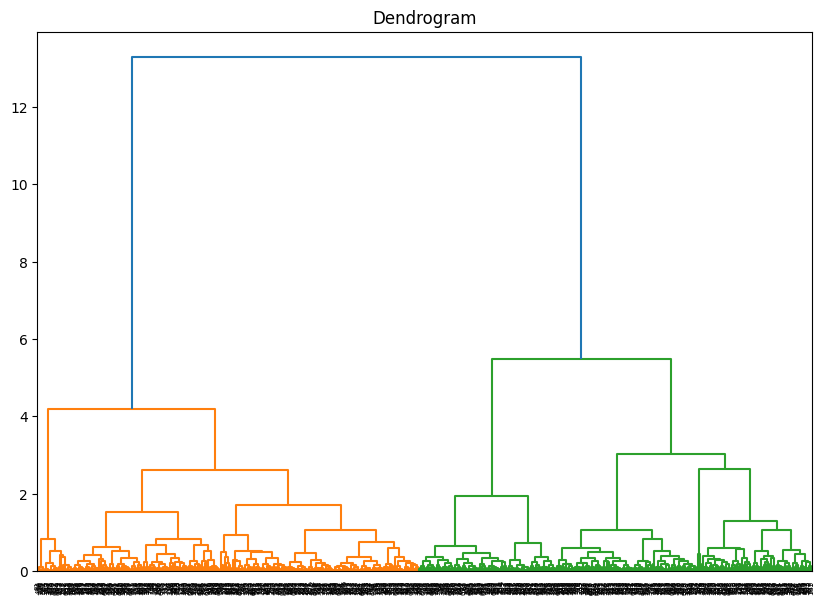

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=2500, color='r', linestyle='--')
plt.show()

In [17]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

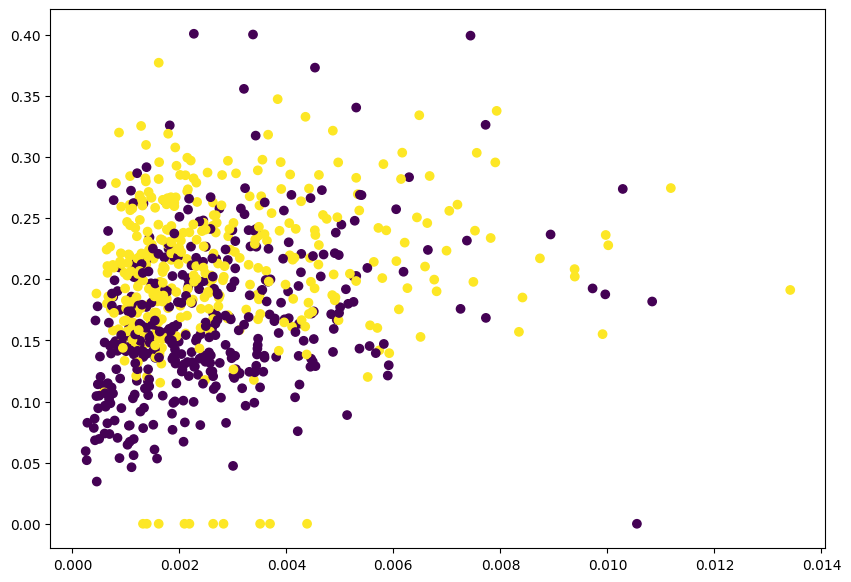

In [18]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['DiabetesPedigreeFunction'], data['BMI'], c=cluster.labels_)
plt.show()

The plot above shows that the clusters seem to overlap well.